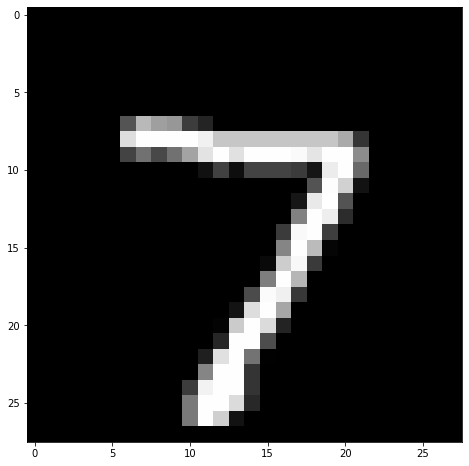

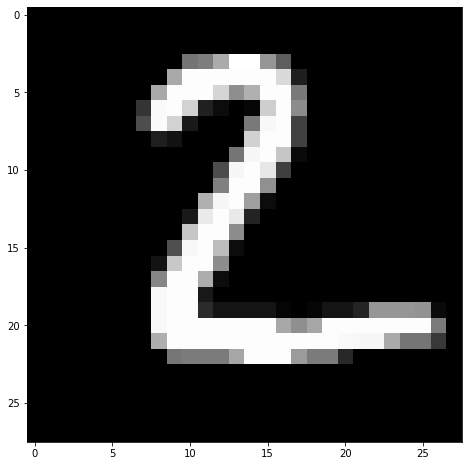

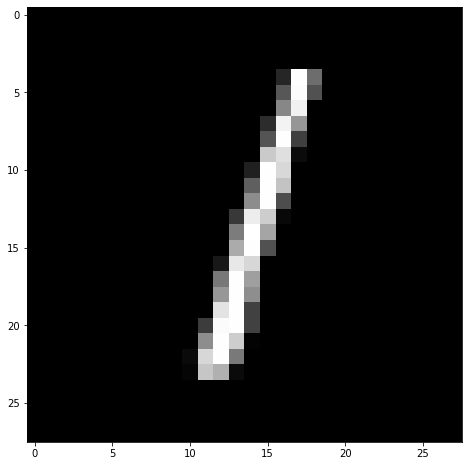

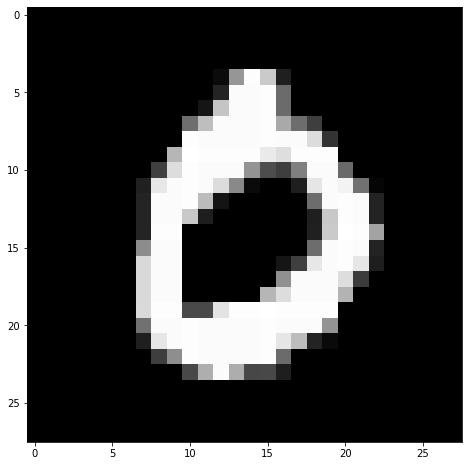

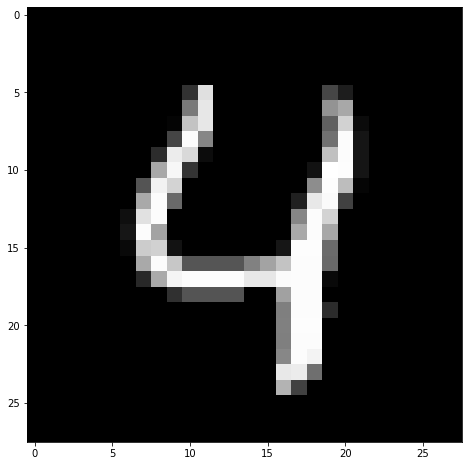

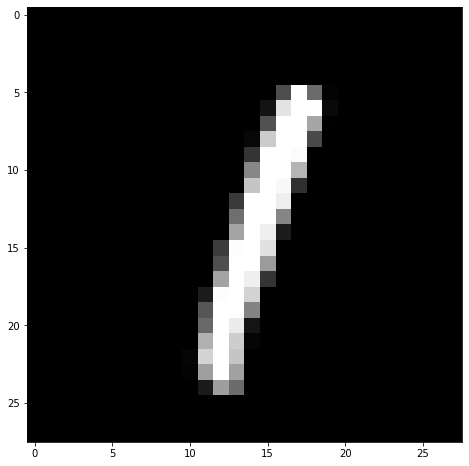

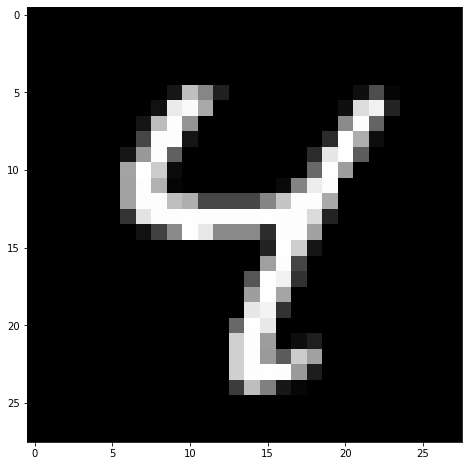

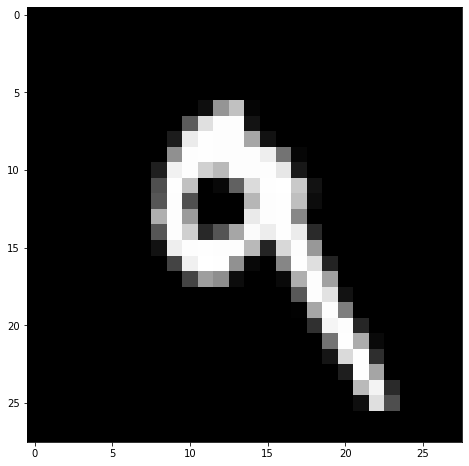

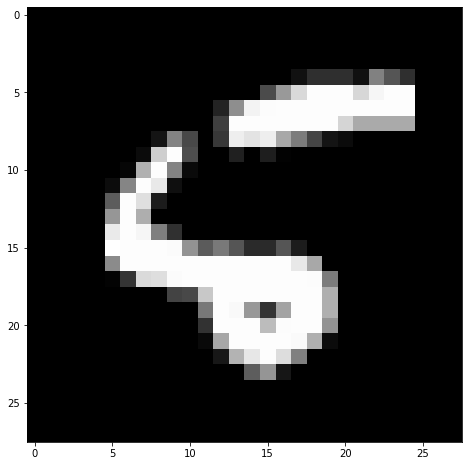

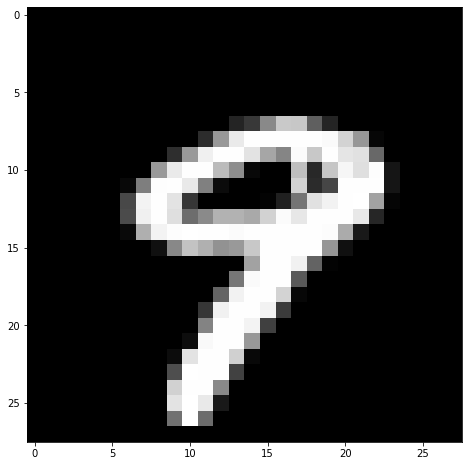

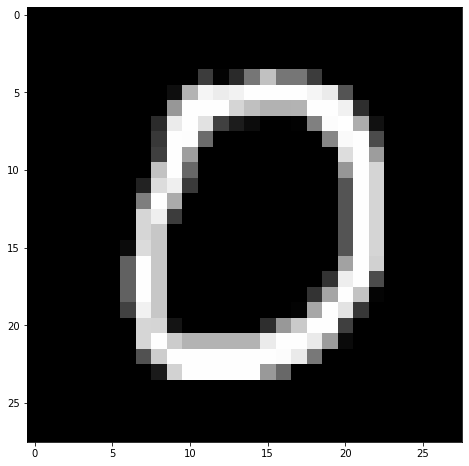

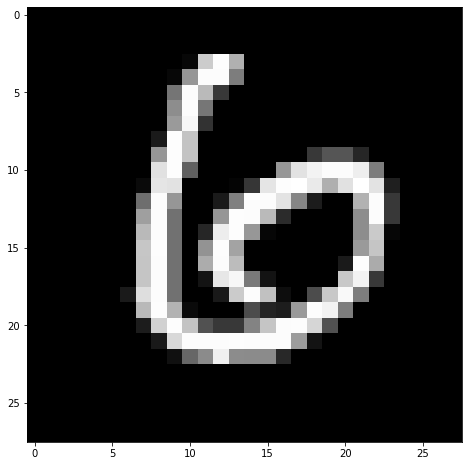

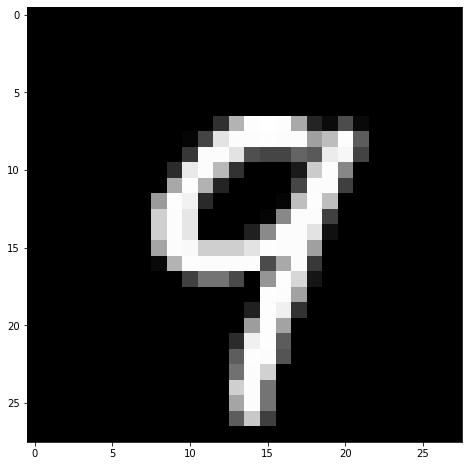

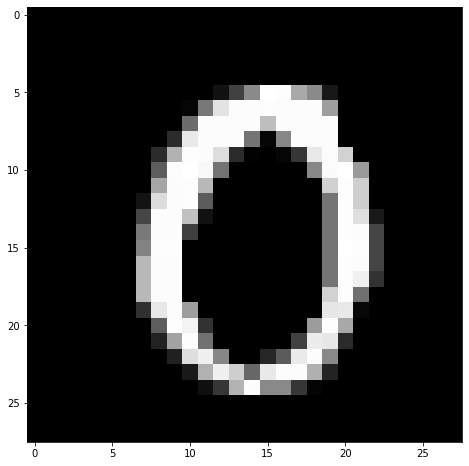

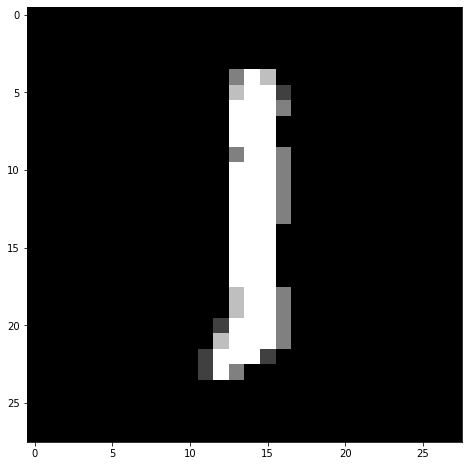

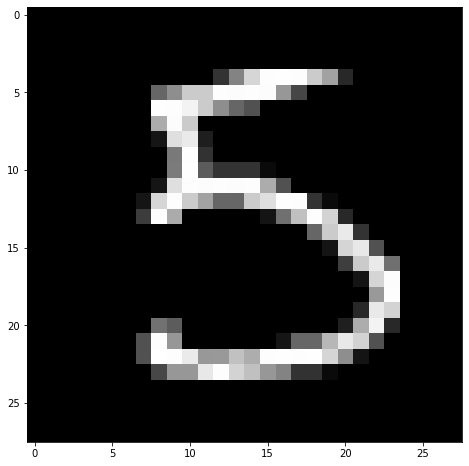

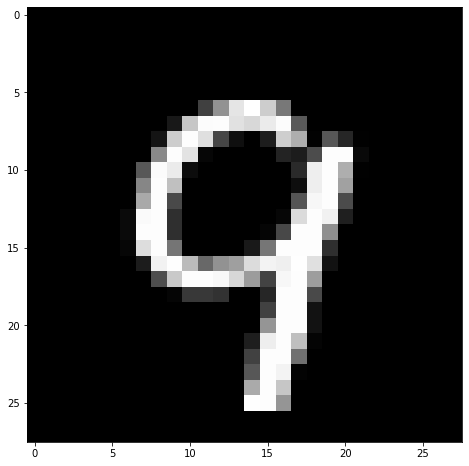

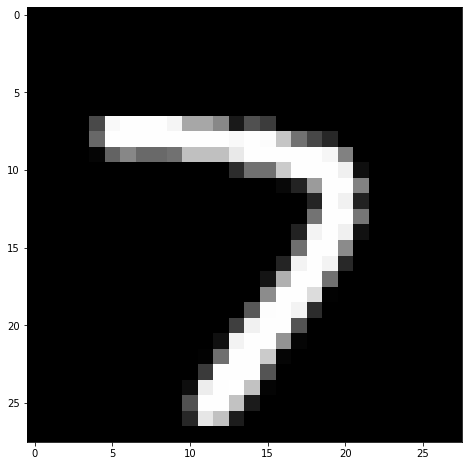

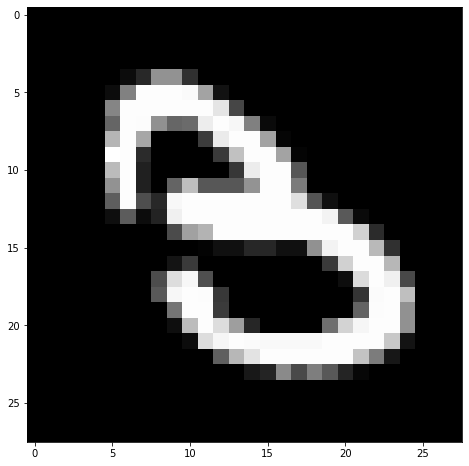

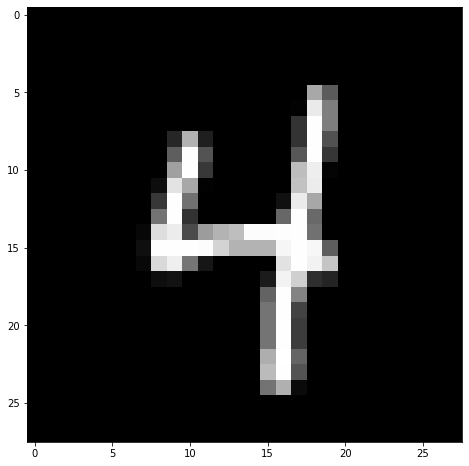

Input
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Predict
[7 5 1 0 4 1 4 9 5 9 0 5 9 0 1 5 9 7 5 9]
Test Accuracy = 0.8
Predicted label is 7



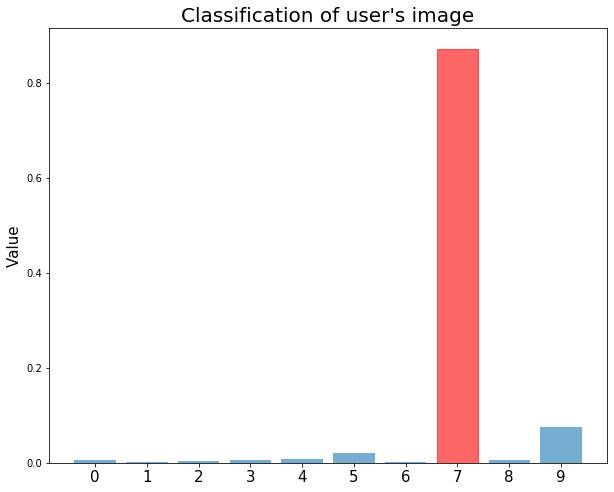

In [58]:
import numpy as np
from deepnet.utils import load_mnist, load_cifar10, accuracy
from deepnet.layers import *
from deepnet.solver import sgd, sgd_momentum, adam
from deepnet.nnet import CNN
import sys
import matplotlib.pyplot as plt
import pickle
import cv2


def make_mnist_cnn(X_dim, num_class):
    conv = Conv(X_dim, n_filter=32, h_filter=3,
                w_filter=3, stride=1, padding=1)
    relu_conv = ReLU()
    maxpool = Maxpool(conv.out_dim, size=2, stride=1)
    flat = Flatten()
    fc = FullyConnected(np.prod(maxpool.out_dim), num_class)
    # print(conv, relu_conv, maxpool, flat, fc)
    return [conv, relu_conv, maxpool, flat, fc]


def make_cifar10_cnn(X_dim, num_class):
    conv = Conv(X_dim, n_filter=16, h_filter=5,
                w_filter=5, stride=1, padding=2)
    relu = ReLU()
    maxpool = Maxpool(conv.out_dim, size=2, stride=2)
    conv2 = Conv(maxpool.out_dim, n_filter=20, h_filter=5,
                 w_filter=5, stride=1, padding=2)
    relu2 = ReLU()
    maxpool2 = Maxpool(conv2.out_dim, size=2, stride=2)
    flat = Flatten()
    fc = FullyConnected(np.prod(maxpool2.out_dim), num_class)
    return [conv, relu, maxpool, conv2, relu2, maxpool2, flat, fc]


if __name__ == "__main__":

    num_test = 20
    training_set, test_set = load_mnist(
        'data/mnist.pkl.gz', num_training=1000, num_test=num_test)
    X, y = training_set
    X_test, y_test = test_set
    # show image---
    for i in range(num_test):
        pixels = X_test[i]
        label = y_test[i]
        pixels = pixels.reshape((28, 28))
        plt.imshow(pixels, cmap='gray')
        plt.show()
    # ---show image 
    #------------------------- input image
#     x_input = cv2.imread('0.jpeg', 0)
#     y_test = 0
# #     x_input = x_input.reshape(210, 210, 1)
#     print(x_input.shape)
#     blob = cv2.dnn.blobFromImage(x_input, 1 / 255.0, (28, 28), swapRB=True, crop=False)
#     print(blob.shape)
    
#     f = open('mean_and_std.pickle', 'rb')
#     mean_and_std = pickle.load(f, encoding='latin1')  # dictionary type, we use 'latin1' for python3

#     mean_image = mean_and_std['mean_image']
#     std = mean_and_std['std']
    
#     print(mean_image.shape)  # (28, 28, 1)
#     print(std.shape)  # (28, 28, 1)
    
#     mean_image = mean_image.transpose(2, 0, 1)
#     std = std.transpose(2, 0, 1)
    
#     print(mean_image.shape)  # (1, 28, 28)
#     print(std.shape)  # (1, 28, 28)
#     print()
    
#     # Subtracting mean image from blob
#     blob[0] -= mean_image
#     # Dividing by standard deviation
#     blob[0] /= std
    #------------------------- END
    
    

    mnist_dims = (1, 28, 28)
    cnn = CNN(make_mnist_cnn(mnist_dims, num_class=10))
    # cnn = sgd_momentum(cnn, X, y, minibatch_size=35, epoch=1,
                       # learning_rate=0.01, X_test=X_test, y_test=y_test)
    hasil = cnn.predict(X_test)
    akurasi = np.argmax(hasil, axis=1)
    ndas = accuracy(y_test, akurasi)
    print("Test Accuracy = {0}".format(ndas))
    
    #--------------------------------------------
    
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    
    # Scores is given for each image with 10 numbers of predictions for each class
    # Getting only one class for each image with maximum value
    print('Predicted label is', labels[np.argmax(hasil, axis=1)[0]])
    print()
    # Now we have each image with its only one predicted class (index of each row)
    # but not with 10 numbers for each class

#     # Printing all scores
#     print(akurasi)

    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10.0, 8.0) # Setting default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

    # Plotting scores
    fig = plt.figure()
    x_positions = np.arange(len(labels))
    barlist = plt.bar(x_positions, hasil[0], align='center', alpha=0.6)
    barlist[np.argmax(hasil[0])].set_color('red')
    plt.xticks(x_positions, labels, fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.title('Classification of user\'s image', fontsize=20)

    plt.show()

    
    #-------------------------
    
    
    if sys.argv[1] == "cifar10":
        training_set, test_set = load_cifar10(
            'data/cifar-10', num_training=1000, num_test=100)
        X, y = training_set
        X_test, y_test = test_set
        cifar10_dims = (3, 32, 32)
        cnn = CNN(make_cifar10_cnn(cifar10_dims, num_class=10))
        cnn = sgd_momentum(cnn, X, y, minibatch_size=10, epoch=200,
                           learning_rate=0.01, X_test=X_test, y_test=y_test)


